In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import operator
import pip
import csv
import pickle
from networkx.algorithms import bipartite

#Create empty network:
G=nx.Graph()


In [3]:
#Read Nodes:
Nodes = csv.reader(open("./Nodes_K.csv"))
next(Nodes, None)
for row in Nodes:    
    G.add_node(row[0])
    G.node[row[0]]["Tipo_lider"]=row[3] #Pendiente de Ver en que row queda tipo de lider
    #print (row)

In [4]:
#Read Edges:
Edges = csv.reader(open("./Edges_K.csv"))
next(Edges, None)
for row in Edges:
    G.add_edge(row[0],row[1])
    G.edge[row[0]][row[1]]["Presunto_implicado"] = row[2] #Pendiente de Ver en que row quede presunto implicado
    #print (row)

C:\Users\suare\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\suare\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\suare\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\suare\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in

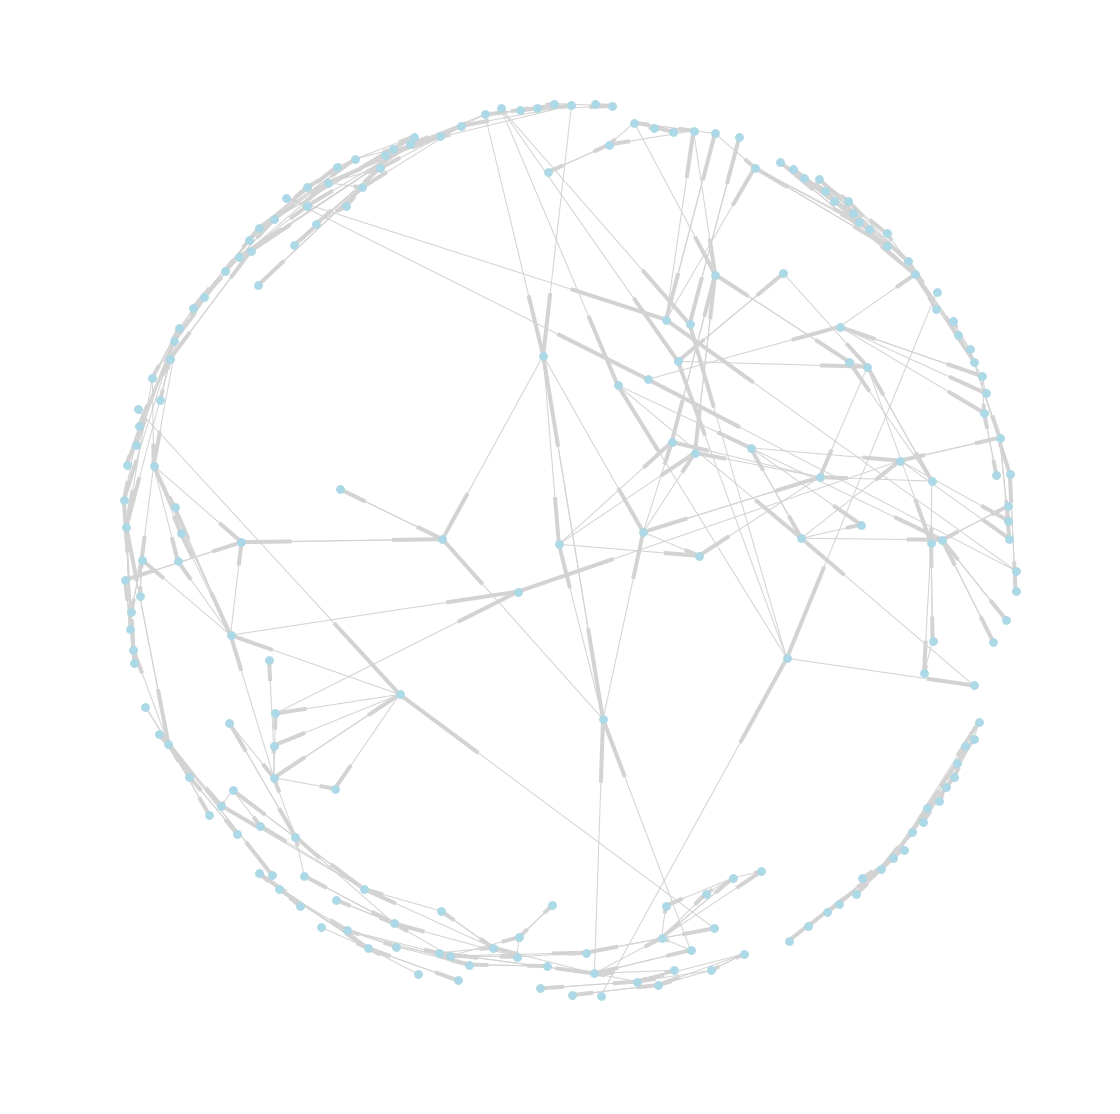

In [5]:
fig=plt.figure(figsize=(15,15))
nx.draw(G, node_size=60, node_color= 'lightblue', edge_color='lightgray', with_labels=False)
plt.axis("tight")
plt.show()

In [340]:
#Calculo out degree de cada nodo
deg =[]
for node in G.nodes():
    deg.append(G.degree(node))

#Uno la cantidad de vinculos con cada Nodo en un dict
vinculos={}
i=0;
for node in G.nodes():
    vinculos.setdefault(node,[])    
    vinculos[node].append(deg[i])
    i=i+1;

#Ordeno la cantidad de vinculos por nodo de mayor a menor y muestro los 5 primeros
V=sorted(vinculos.items(),key=operator.itemgetter(1))
V.reverse()
V[0:5]

[('Quellon Greyjoy', [9]),
 ('Oberyn Martell', [8]),
 ('Walder Frey', [7]),
 ('Eddard Stark', [6]),
 ('Catelyn Stark', [5])]

In [304]:
#Se extrae y organiza la clase de pais
tl=[]
for node in G.nodes():
    cp.append(G.node[node]["Tipo_lider"]);  
    
def quitarDuplicados(lst):
    lst = list(set(lst))    #quita duplicados
    lst.sort()              #ordena la lista
    return lst

cp=quitarDuplicados(tl)

In [318]:
# Función de densidades
def density(G):

    n=G.number_of_nodes()
    m=G.number_of_edges()

    if m==0 or n <= 1:
        d=0.0
    else:
        if G.is_directed():
            d=m/float(n*(n-1))
        else:
            d= m*2.0/float(n*(n-1))
    return d

In [334]:
#Creación de Subgrafos para las clasificaciones de tipo de lider y calculo densidades

densidad=[]

abogado_nodes=[]
for node in G.nodes():
    if G.node[node]["Tipo_lider"]=="ABOGADO DEFENSOR DE DDHH":
        abogado_nodes.append(node);        
abogado = G.subgraph(abogado_nodes)
densidad.append(density(abogado))

comunicador_nodes=[]
for node in G.nodes():
    if G.node[node]["Tipo_lider"]=="COMUNICADOR DEFENSOR DE DERECHOS HUMANOS":
        comunicador_nodes.append(node);         
comunicador = G.subgraph(comunicador_nodes) 
densidad.append(density(comunicador))

defensorl_nodes=[]
for node in G.nodes():
    if G.node[node]["Tipo_lider"]=="DEFENSOR (A) LGTBI":
        defensorl_nodes.append(node);         
defensorl = G.subgraph(defensorl_nodes) 
densidad.append(density(defensorl))

lafro_nodes=[]
for node in G.nodes():
    if G.node[node]["Tipo_lider"]=="LêDER AFRODESCENDIENTE":
        lafro_nodes.append(node);         
lafro = G.subgraph(lafro_nodes) 
densidad.append(density(lafro))

lamb_nodes=[]
for node in G.nodes():
    if G.node[node]["Tipo_lider"]=="LêDER AMBIENTALISTA":
        lamb_nodes.append(node);         
lamb = G.subgraph(lamb_nodes) 
densidad.append(density(lamb))

lcamp_nodes=[]
for node in G.nodes():
    if G.node[node]["Tipo_lider"]=="LêDER CAMPESINO":
        lcamp_nodes.append(node);         
lcamp = G.subgraph(lcamp_nodes) 
densidad.append(density(lcamp))



In [377]:
#Uno la densidad con cada clasificacion en un dict
CPDens={}

for j in range(0,len(cp)):
    CPDens.setdefault(cp[j],[])    
    CPDens[cp[j]].append(densidad[j])
    
#Ordeno la densidad por casa de mayor a menor y muestro
DCP=sorted(CPDens.items(),key=operator.itemgetter(1))
DCP.reverse()
DCP[0:1]

[('House Bolton', [0.5]),
 ('House Tully', [0.25]),
 ('House Arryn', [0.25]),
 ('House Redwyne', [0.16666666666666666]),
 ('House Baratheon', [0.14444444444444443])]

In [347]:
#Conexiones entre desarrollados y subdesarrollados

In [389]:
#Función Conexiones Clasificacion Pais 

def conEXT(cp):  
    
    Degree=G.degree(cp)
    
    Totconexiones=0;
    
    for node in Degree:
        Totconexiones=Totconexiones+Degree[node]
    
    conexionesINT=cp.number_of_edges()
     
    conexionesEXT=Totconexiones-conexionesINT;
    
    return conexionesEXT

In [403]:
#Calculo conexiones externas

conexter=[]

conexter.append(conEXT(desarrollado))
conexter.append(conEXT(subdesarrollado))

#Uno la cantidad de conexiones externas con cada clasificacion en un dict
CPEXTLinks={}

for j in range(0,len(cp)):
    CPEXTLinks.setdefault(cp[j],[])    
    CPEXTLinks[cp[j]].append(conexter[j])
    
#Ordeno la cantidad de conexiones por clasificacion de pais de mayor a menor y muestro 
CE=sorted(CPEXTLinks.items(),key=operator.itemgetter(1))
CE.reverse()
CE[0:1]

[('House Lannister', [96]),
 ('House Stark', [78]),
 ('House Frey', [58]),
 ('House Tyrell', [46]),
 ('House Targaryen', [38]),
 ('House Greyjoy', [36]),
 ('House Baratheon', [33]),
 ('House Martell', [25]),
 ('House Tully', [22]),
 ('House Arryn', [12])]

In [ ]:
#Cercanias

In [1]:
#Función para calcular las cercanias de una casa determinada, devuelve los valores en una biblioteca ordenados de mayor a menor 
def closeness(cp):
    
    cercanias=[]
    i=0;
    
    for node in cp.nodes():
            
        cercanias.append(nx.closeness_centrality(G,u=node,distance=None,normalized=True)) 
        
    #Uno las cercanias con cada nodo en un dict
    cercaniasdic={}

    for node in cp.nodes():
        
        cercaniasdic.setdefault(node,[])    
        cercaniasdic[node].append(cercanias[i])
        i=i+1;
        
    #Ordeno las cercanias con cada nodo de mayor a menor 
    D=sorted(cercaniasdic.items(),key=operator.itemgetter(1))
    D.reverse()
            
    return D

In [462]:
#Identitificación de los museos con mayor closeness_centrality de las clasificaciones de pais 

print("Museos con mayor closeness_centrality de la clasificacion de pais:")
print("")
ranking=[]

CCpd = closeness(desarrollado)
ranking.append(CCpd[0])
print("Mayor CC Paises Desarrolados :",CCpd[0])

CCpsd = closeness(subdesarrollado)
ranking.append(CCpsd[0])
print("Mayor CC Paises Subdesarrollados :",CCpsd[0])


Personajes con mayor closeness_centrality de las casas principales:

Mayor CC HouseLannister : ('Tytos Lannister', [0.07196401799100449])
Mayor CC HouseStark : ('Rickard Stark', [0.04230317273795535])
Mayor CC HouseFrey : ('Walder Frey', [0.06832298136645962])
Mayor CC HouseTyrell : ('Unknown mother Tyrell', [0.04186795491143317])
Mayor CC HouseTargaryen : ('Aegon V Targaryen', [0.047778308647873864])
Mayor CC HouseGreyjoy : ('Quellon Greyjoy', [0.0626086956521739])
Mayor CC HouseBaratheon : ('Steffon Baratheon', [0.03247450348899625])
Mayor CC HouseMartell : ('Oberyn Martell', [0.043478260869565216])
Mayor CC HouseTully : ('Hoster Tully', [0.04771763777974958])
Mayor CC HouseTargaryen : ('Jasper Arryn', [0.020611916264090174])


In [463]:
#Betweness

In [472]:
betwnness=nx.betweenness_centrality(G,k=None, normalized=True, weight=None,endpoints=False,seed=None)
betwnness=sorted(betwnness.items(),key=operator.itemgetter(1))
betwnness.reverse()
betwnness[0:2]

[('Eddard Stark', 0.00519440926785798),
 ('Beron Stark', 0.004760564701468036),
 ('Jason Lannister', 0.003939777683973547),
 ('Rickard Stark', 0.0039046010975094976),
 ('Brandon Stark son of Cregan', 0.003869424511045448)]

In [ ]:
#Clustering (Se toma no dirigida)

In [476]:
G2=nx.Graph()
#Read Nodes:
Nodes = csv.reader(open("./Nodes_K.csv"))
next(Nodes, None)
for row in Nodes:    
    G2.add_node(row[0])
    G2.node[row[0]]["House"]=row[3]
    #print (row)
#Read Edges:
Edges = csv.reader(open("./Edges_K.csv"))
next(Edges, None)
for row in Edges:
    G2.add_edge(row[0],row[1])
    G2.edge[row[0]][row[1]]["Relation"] = row[2]
    #print (row)

In [477]:
nx.clustering(G2, nodes=None, weight=None)

{'Aegon Targaryen son of Rhaegar': 1.0,
 'Aegon V Targaryen': 0.0,
 'Aeron Greyjoy': 1.0,
 'Aerys II Targaryen': 0.26666666666666666,
 'Alannys Harlaw': 0.4,
 'Alerie Hightower': 0.4,
 'Alys Arryn': 0.0,
 'Alys Karstark': 0.6666666666666666,
 'Alys Stackspear': 1.0,
 'Alysanne Farman': 0.0,
 'Amarei Crakehall': 1.0,
 'Amerei Frey': 0.16666666666666666,
 'Antario Jast': 0.0,
 'Arra Norrey': 0.0,
 'Artos Stark': 0.3333333333333333,
 'Arya Flint': 0.0,
 'Arya Stark': 1.0,
 'Asha (Yara) Greyjoy': 0.3333333333333333,
 'Balon Greyjoy': 0.23809523809523808,
 'Benfrey Frey': 0.3333333333333333,
 'Benjen Stark': 1.0,
 'Beron Stark': 0.26666666666666666,
 'Betha Blackwood': 0.0,
 'Bethany Rosby': 0.3333333333333333,
 'Bran Stark': 1.0,
 'Brandon Stark': 0.3333333333333333,
 'Brandon Stark Burner': 0.0,
 'Brandon Stark son of Cregan': 0.3,
 'Cassana Baratheon': 0.5,
 'Catelyn Stark': 0.21428571428571427,
 'Cerenna Lannister': 1.0,
 'Cerissa Brax': 0.6666666666666666,
 'Cersei Lannister': 0.266666

In [480]:
nx.average_clustering(G2)

0.4242743367743368

In [ ]:
#Eigenvector centrality

In [505]:
Gc=max(nx.connected_component_subgraphs(G2),key=len)
LITG=nx.eigenvector_centrality_numpy(Gc)

In [506]:
LITG=sorted(LITG.items(),key=operator.itemgetter(1))
LITG.reverse()   

In [507]:
LITG

[('Tywin Lannister', 0.29286328772259673),
 ('Cersei Lannister', 0.2685257630832052),
 ('Joanna Lannister', 0.2447786957607326),
 ('Tytos Lannister', 0.23985724797654853),
 ('Jeyne Marbrand', 0.2398572479765485),
 ('Genna Lannister', 0.22809294963828264),
 ('Jaime Lannister', 0.22383160137688957),
 ('Robert Baratheon', 0.20755344722191868),
 ('Emmon Frey', 0.19149477333217563),
 ('Walder Frey', 0.19083034072034188),
 ('Joffrey Baratheon', 0.17554163544462154),
 ('Tommen Baratheon', 0.17554163544462145),
 ('Eddard Stark', 0.15086968512252016),
 ('Myrcella Baratheon', 0.15071745334042924),
 ('Tyrion Lannister', 0.14316566542979695),
 ('Kevan Lannister', 0.13211295508926083),
 ('Catelyn Stark', 0.13006244381908677),
 ('Tygett Lannister', 0.11763633220782042),
 ('Jason Lannister', 0.1169300875770692),
 ('Margaery Tyrell', 0.11528003599319547),
 ('Bethany Rosby', 0.11436711766190573),
 ('Cleos Frey', 0.11256944612726043),
 ('Gerion Lannister', 0.10330080055026596),
 ('Steffon Baratheon', 0.